In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv(r"C:\Users\anita\OneDrive\Desktop\Python100Days\Lead_Scoring_Assignment\Lead+Scoring+Case+Study\Leads.csv")

In [12]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
df.shape

(9240, 37)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
df=df.replace('Select', np.nan)

In [16]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [17]:
# Converting null cells in percentage to dr
df.isnull().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [18]:
missing_col=[]
for i in df.columns:
    if (df[i].isnull().mean())*100>35:
        missing_col.append(i)
print('Columns with more than 35% of missing values are', missing_col)    

Columns with more than 35% of missing values are ['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [19]:
for i in missing_col:
    df=df.drop(i, axis=1)

In [20]:
# Checking again
df.isnull().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

### Visualizing individual columns with missing values

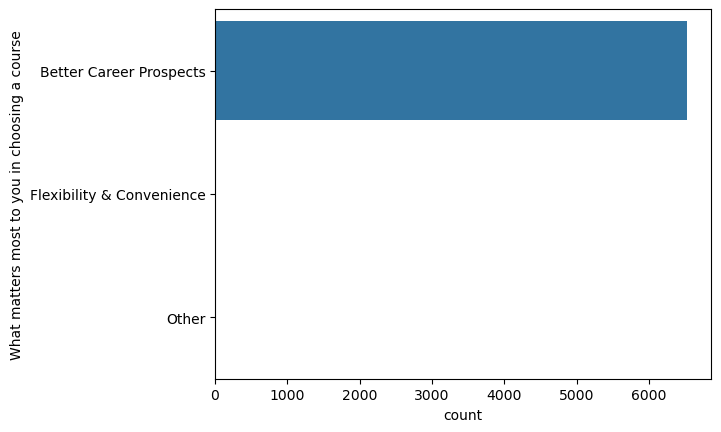

In [21]:
# Visualizing individual columns
sns.countplot(df['What matters most to you in choosing a course'])
plt.xticks
plt.show()

##### This is a highly skewed column and has no information for further analysis. Hence, this column can be dropped.

In [22]:
df=df.drop('What matters most to you in choosing a course', axis=1)

In [23]:
df.shape

(9240, 26)

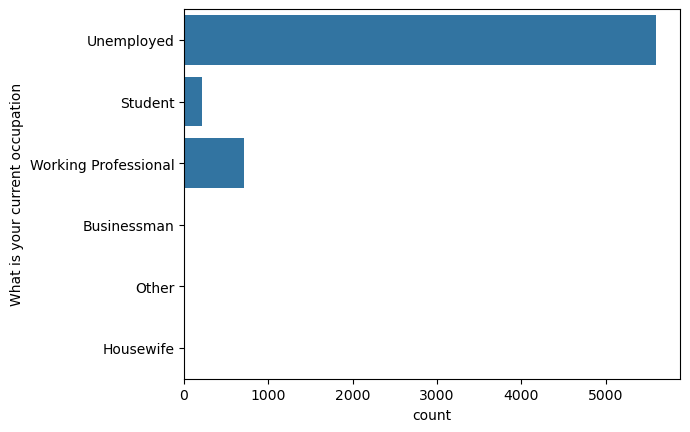

What is your current occupation
Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: count, dtype: float64

In [24]:
# Visualizing individual columns
sns.countplot(df['What is your current occupation'])
plt.xticks
plt.show()
# Finding in terms of percentage
df['What is your current occupation'].value_counts()/len(df)*100

##### Since most of the values are "Unemployed", we can impute the null vlues with unemployed

In [25]:
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Unemployed')

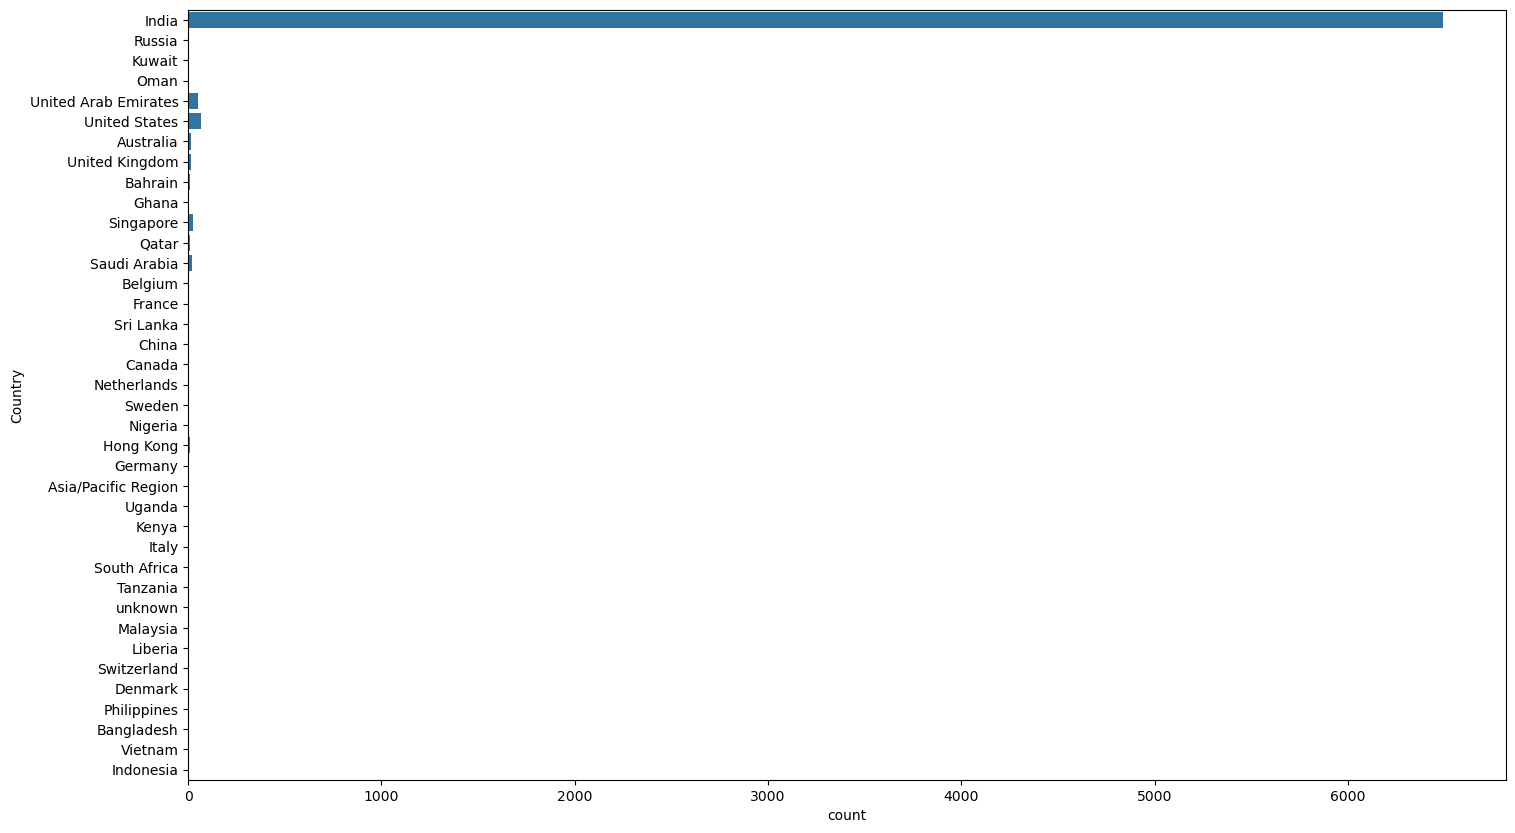

Country
India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switze

In [26]:
# Visualizing individual columns
plt.figure(figsize=(17,10))
sns.countplot(df['Country'])
plt.xticks
plt.show()
# Visualizing in terms of percentage
df['Country'].value_counts()/len(df)*100

In [27]:
df['Country']=df['Country'].replace(np.nan,'India')

##### Country column has 26% missing values and most of the data is from India. So, we imputed the missing values with mode which is India.

##### We can impute missing values with Mumbai.

TotalVisits, Total Time Spent on Website, Page Views Per Visit, have less than 2% of null values. We can drop them.

In [28]:
# Droping less than 2% of null values.
df=df.dropna()

In [29]:
# Checking the columns again for null values and shape
print(df.shape)
print(df.isnull().sum())

(9074, 26)
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Cha

In [30]:
# More than 98% of rows has been retained
(len(df.index)/9240)*100

98.2034632034632

In [31]:
# Checking for duplicates
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicates available in the data.

## Univariate Analysis

Converted is the target variable which Indicates whether a lead has been successfully converted (1) or not (0)

In [32]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

### 1. Lead Origin

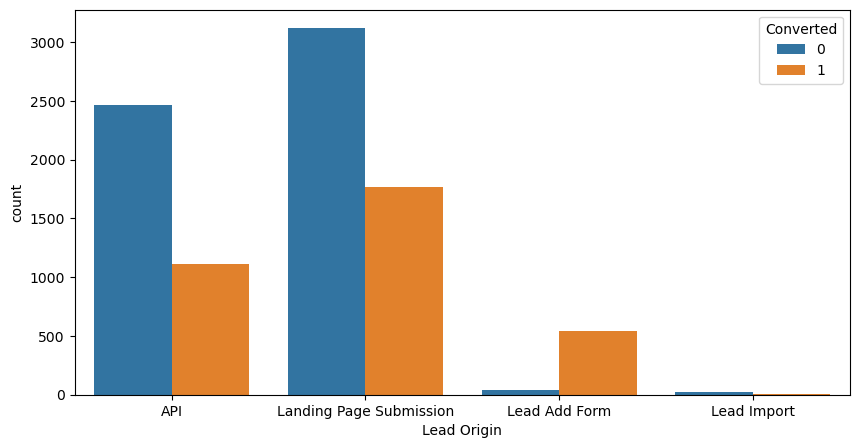

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.xticks()
plt.show()

In [34]:
(df['Lead Origin'].value_counts())/len(df['Converted'])*100

Lead Origin
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: count, dtype: float64

##### API and Landing Page Submission has less conversion ratio. 
There are 2 ways for better conversion rate:
1. Focus and improve conversion rate of API and Landing page submission leads.
2. Focus and get more number of leads from Lead Add Form. Since the conversion rate is already high, more leads will improve the overll conversion rate.

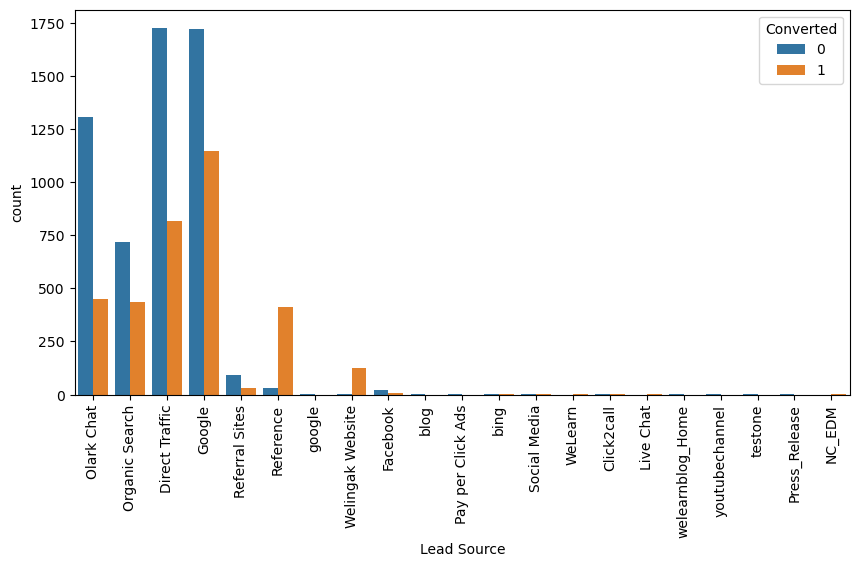

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", data = df, hue='Converted')
plt.xticks(rotation = 90)
plt.show()

Reference leads have higher conversion rate, Focus on more leads through reference.
Also, through Google organic search there is better conversion rate than direct traffic. 

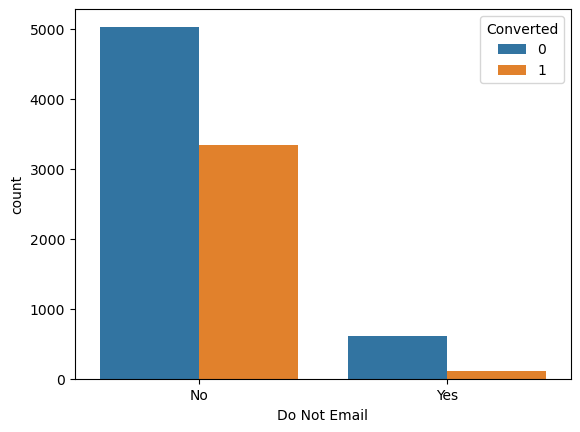

In [36]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df,)
plt.xticks()
plt.show()

Most entries are 'No', so no inferences can be drawn from this parameter.

In [37]:
df=df.drop("Do Not Email", axis=1)

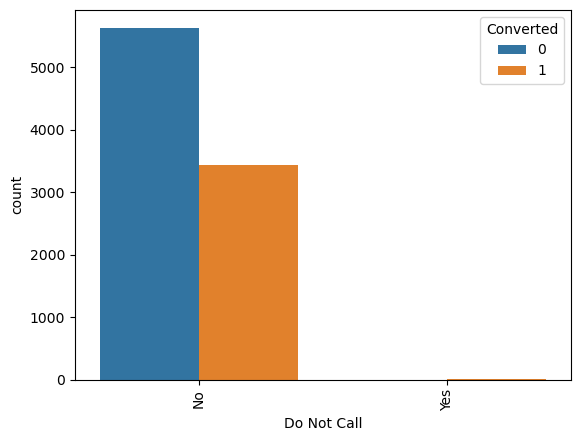

In [38]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

Highly skewed, so no inferences can be drawn from this

In [39]:
df=df.drop("Do Not Call", axis=1)

In [40]:
df.TotalVisits.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

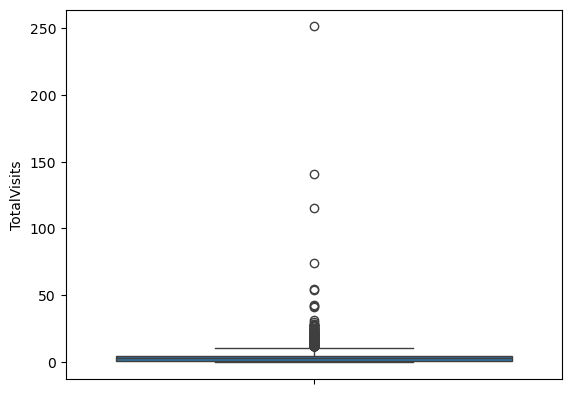

In [41]:
sns.boxplot(df['TotalVisits'])
plt.show()

There are many outlier in the data. We can cap the outliers to 90% of the value for analysis.

In [42]:
Q1 = df['TotalVisits'].quantile(0.05)
Q3 = df['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['TotalVisits'] >= lower_bound) & (df['TotalVisits'] <= upper_bound)]

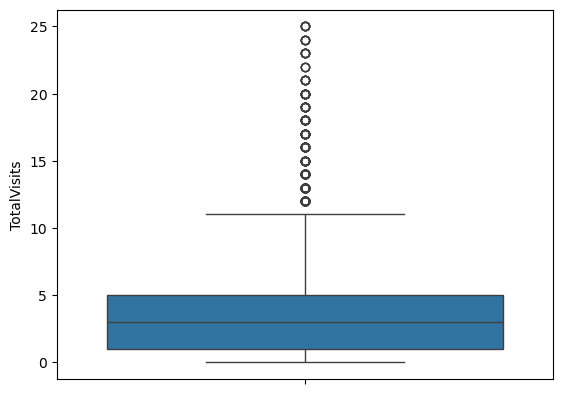

In [43]:
sns.boxplot(df['TotalVisits'])
plt.show()

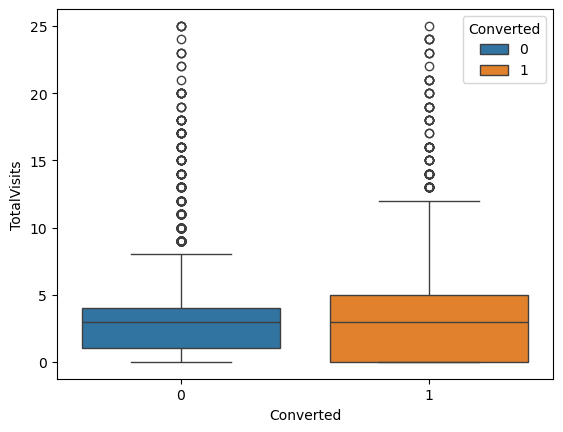

In [44]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', hue='Converted', data = df)
plt.show()

Median for coverted and not converted are same. Hence, the data is not useful in concluding anything.

In [45]:
df=df.drop("TotalVisits", axis=1)

In [46]:
df['Total Time Spent on Website'].describe()

count    9052.000000
mean      483.018118
std       545.555210
min         0.000000
25%        10.000000
50%       246.000000
75%       924.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

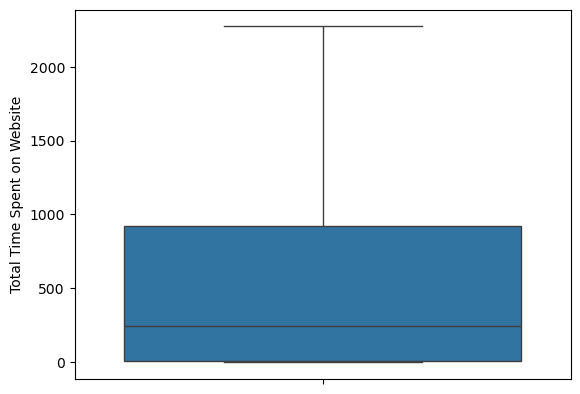

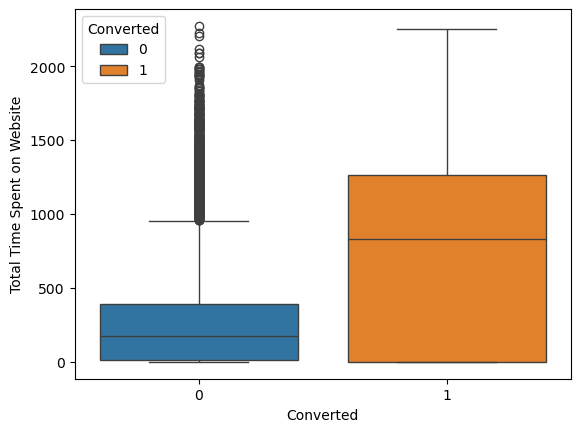

In [47]:
sns.boxplot(df['Total Time Spent on Website'])
plt.show()
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', hue='Converted', data = df)
plt.show()

Mean is higher for the leads spending more time on the weblise. Hence, they are more likely to be converted.

In [48]:
df['Page Views Per Visit'].describe()

count    9052.000000
mean        2.357406
std         2.078127
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        24.000000
Name: Page Views Per Visit, dtype: float64

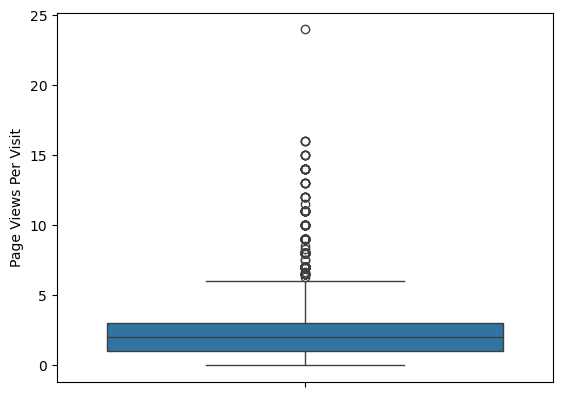

In [49]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [50]:
# Calculate the 5th and 95th percentiles
percentiles = df['Page Views Per Visit'].quantile([0.05, 0.95]).values

# Cap values below the 5th percentile and above the 95th percentile
df.loc[df['Page Views Per Visit'] <= percentiles[0], 'Page Views Per Visit'] = percentiles[0]
df.loc[df['Page Views Per Visit'] >= percentiles[1], 'Page Views Per Visit'] = percentiles[1]

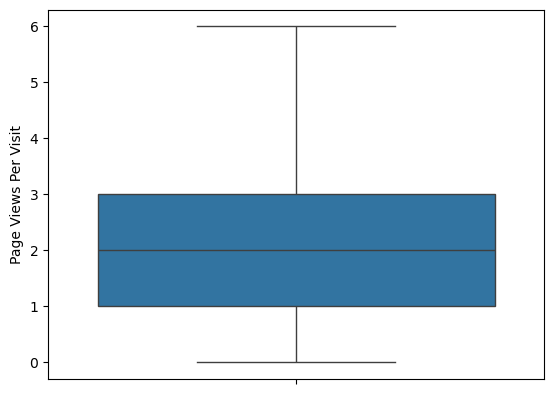

In [51]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

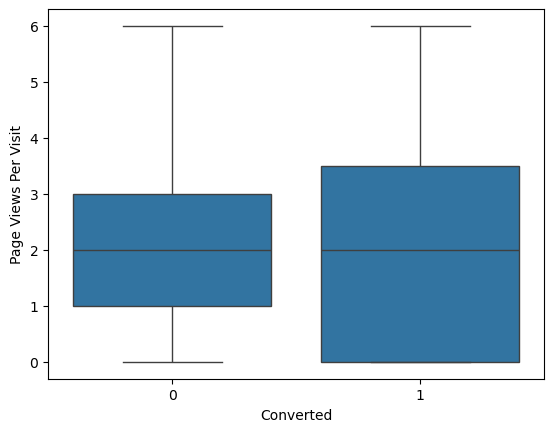

In [52]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data=df)
plt.show()

Median are same so no conclusion can be made from 'Page Views Per Visit' column.

In [53]:
df['Last Activity'].describe()

count             9052
unique              17
top       Email Opened
freq              3426
Name: Last Activity, dtype: object

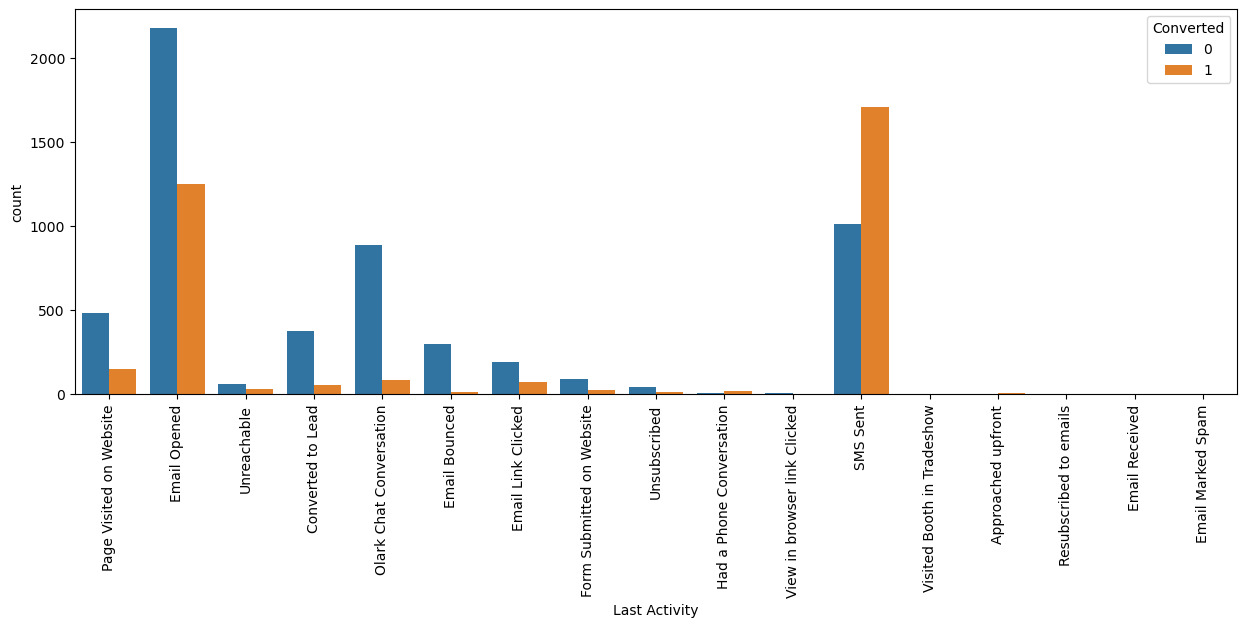

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(x="Last Activity", hue="Converted", data=df)
plt.xticks(rotation = 90)
plt.show()

In [55]:
# We can club all the options with less imporance into one activity as "Other_Activity.
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [56]:
df['Last Activity'].describe()

count             9052
unique              11
top       Email Opened
freq              3426
Name: Last Activity, dtype: object

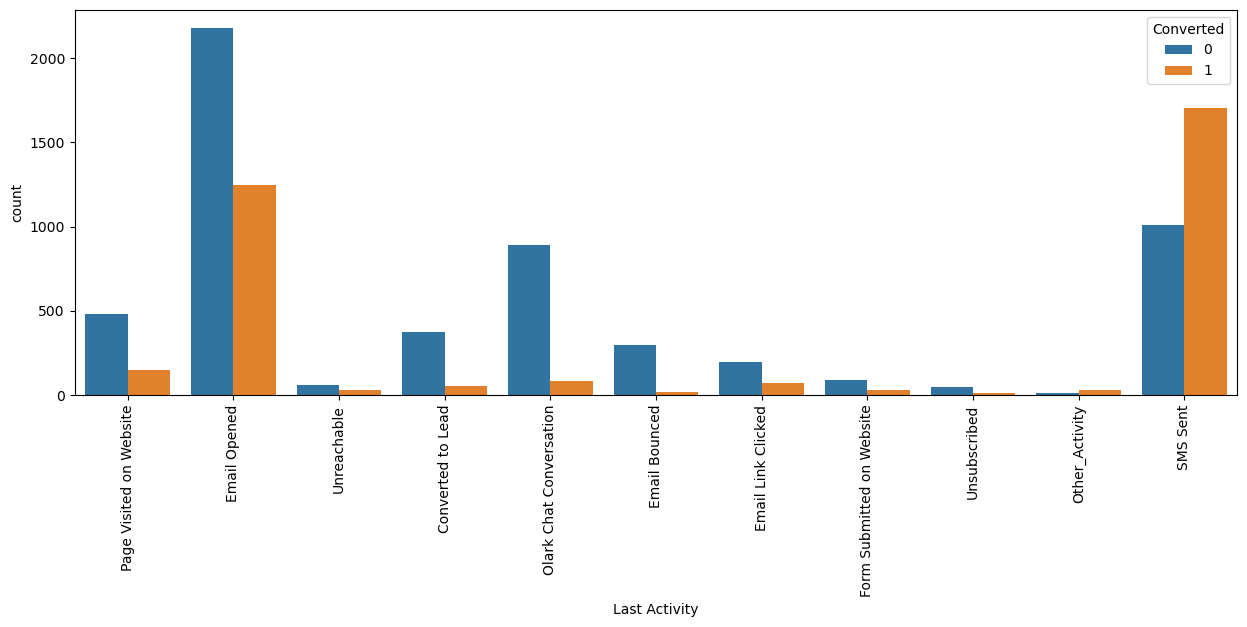

In [57]:
# Visualising the last activity again
plt.figure(figsize=(15,5))
sns.countplot(x="Last Activity", hue="Converted", data=df)
plt.xticks(rotation = 90)
plt.show()

Most of the lead have their Email opened as their last activity.However, the conversion rate is less than SMS Sent
Conversion rate for leads with last activity as SMS Sent is higher.

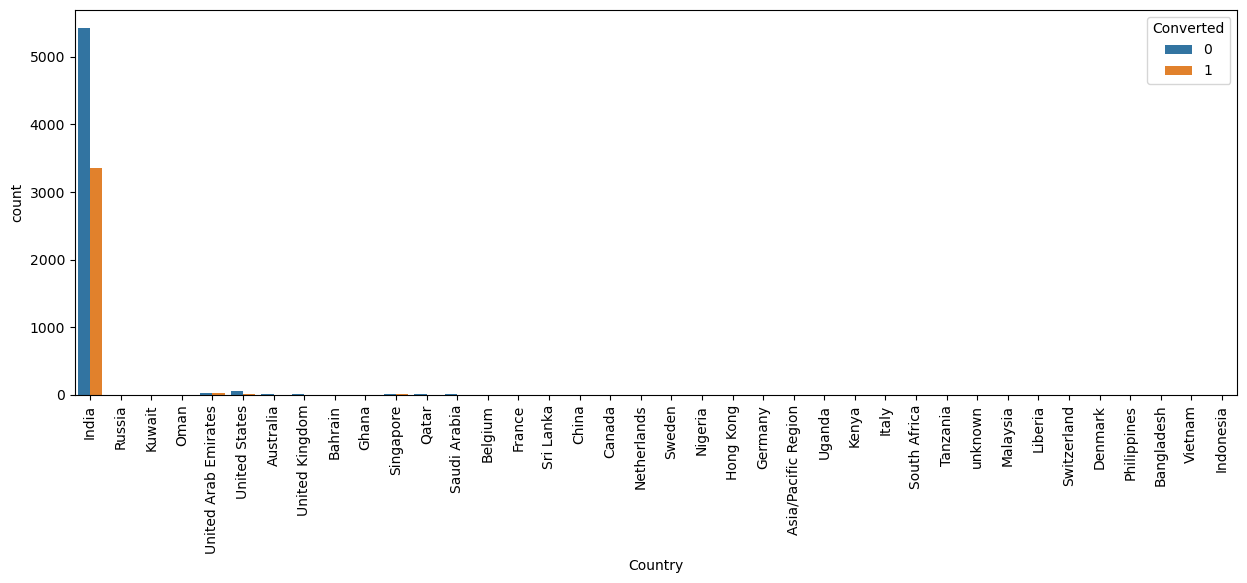

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Country", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Most leads are from India. So no inference can be drawn from here.

In [59]:
df=df.drop("Country", axis=1)

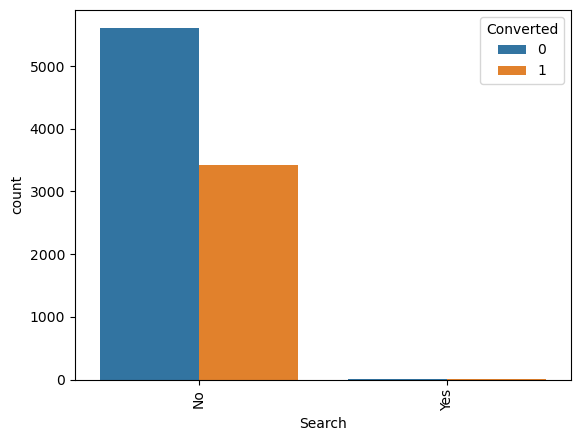

In [60]:
sns.countplot(x = "Search", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Most entries are No, so no inference can be drawn from this parameter.

In [61]:
df=df.drop("Search", axis=1)

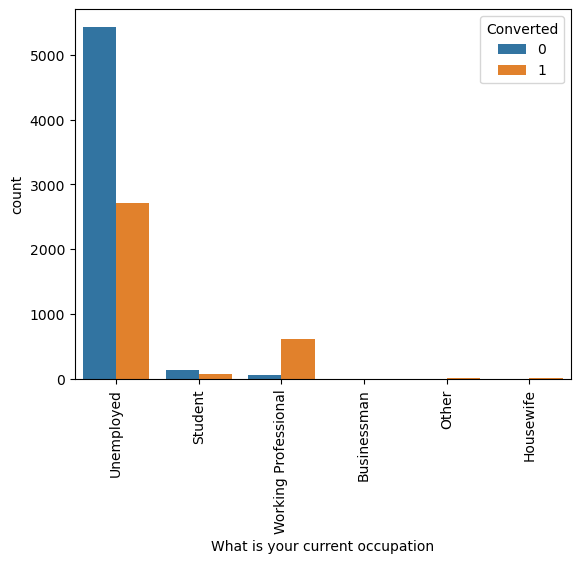

In [62]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Since, working professional have better conversion rate, focus more on the courses for the working professionals.
Improve conversion rate for Unemployed target group.

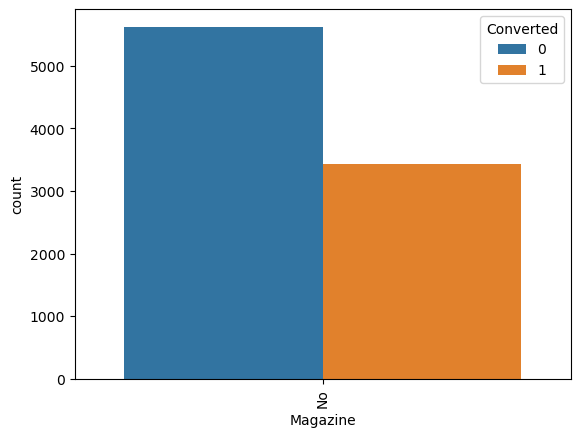

In [63]:
sns.countplot(x = "Magazine", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

No inference can be drawn from this parameter

In [64]:
df=df.drop("Magazine", axis=1)

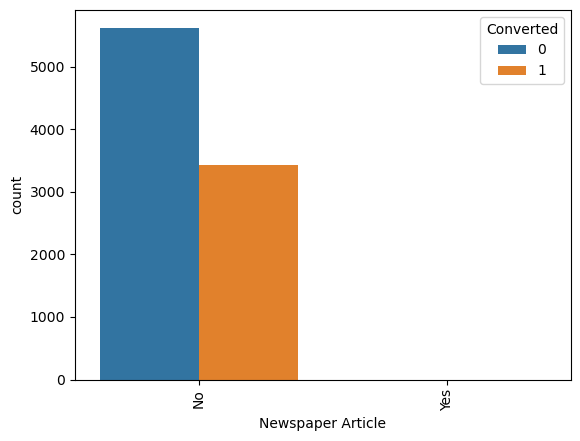

In [65]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Most entries are No. It means the it does not have any impact. No inference can be drawn from this parameter.

In [66]:
df=df.drop("Newspaper Article", axis=1)

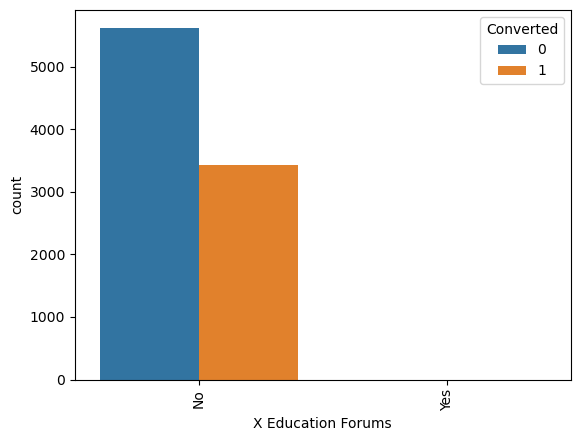

In [67]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

No inference can be drawn from this parameter

In [68]:
df=df.drop("X Education Forums", axis=1)

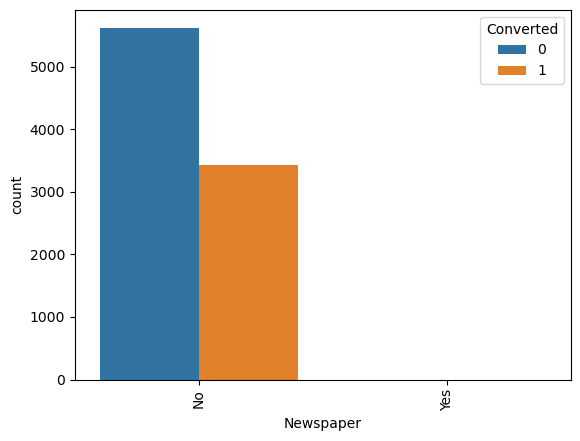

In [69]:
sns.countplot(x = "Newspaper", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

No inference can be drawn from this parameter

In [70]:
df=df.drop("Newspaper", axis=1)

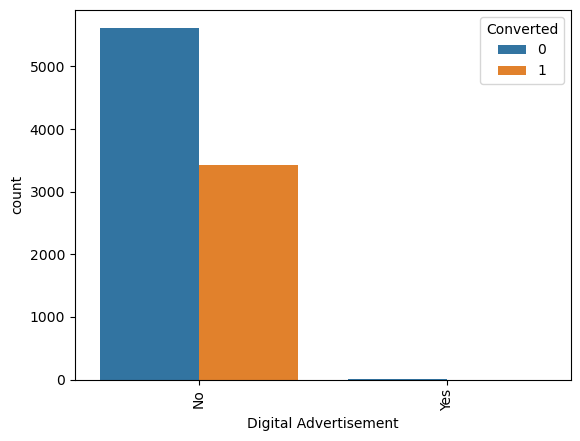

In [71]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

No inference can be drawn from this parameter.

In [72]:
df=df.drop("Digital Advertisement", axis=1)

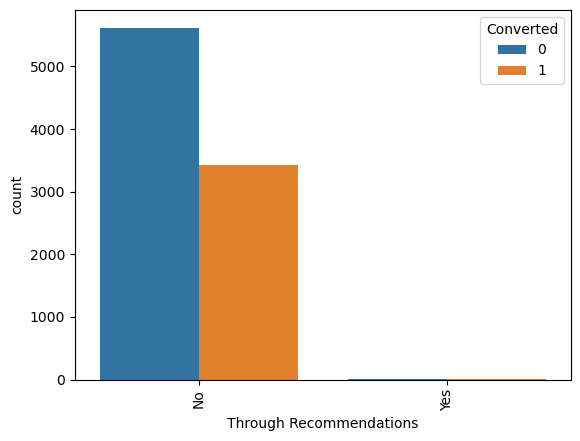

In [73]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

No inference can be drawn from this parameter

In [74]:
df=df.drop("Through Recommendations", axis=1)

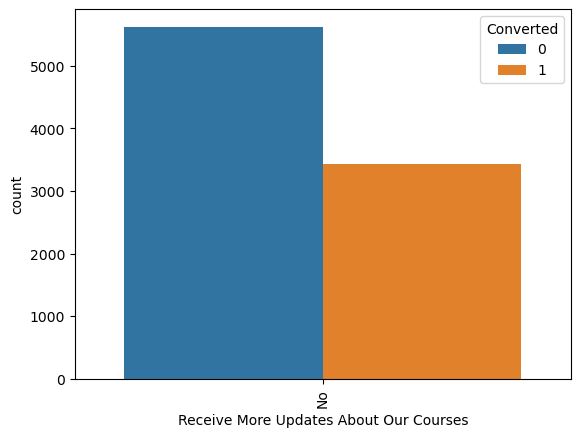

In [75]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

No inference can be drawn from this parameter

In [76]:
df=df.drop("Receive More Updates About Our Courses", axis=1)

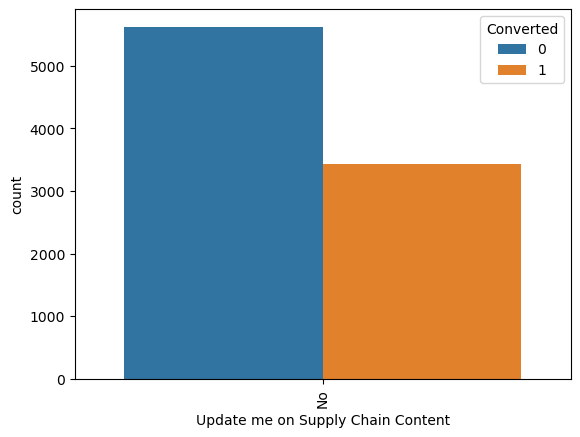

In [77]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

No inference can be drawn from this parameter

In [78]:
df=df.drop("Update me on Supply Chain Content", axis=1)

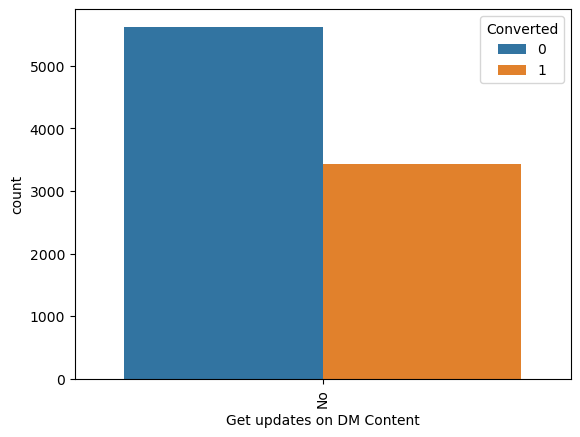

In [79]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

No inference can be drawn from this parameter

In [80]:
df=df.drop("Get updates on DM Content", axis=1)

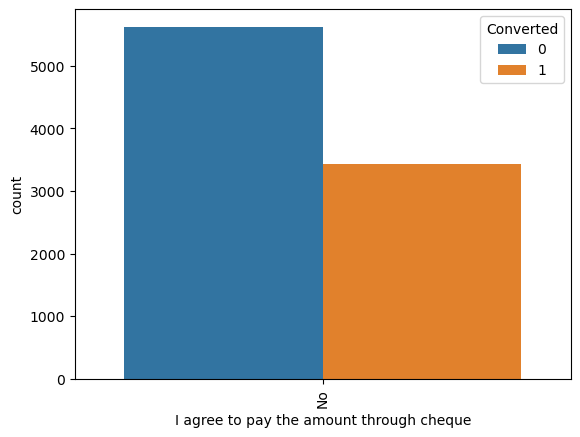

In [81]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

No inference can be drawn from this parameter.

In [82]:
df=df.drop("I agree to pay the amount through cheque", axis=1)

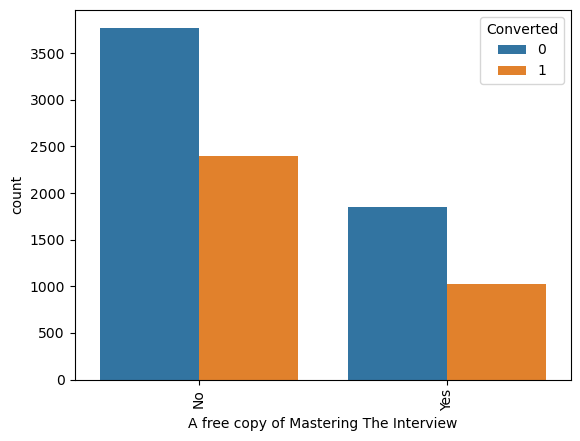

In [83]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

No inference can be drawn from this parameter.

In [84]:
df=df.drop("A free copy of Mastering The Interview", axis=1)

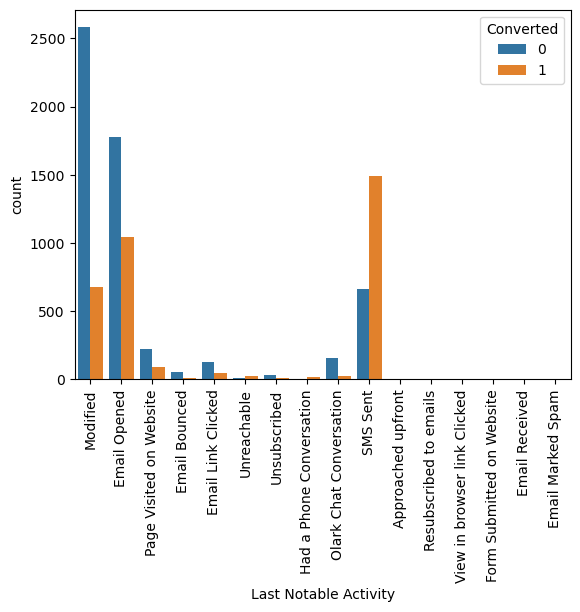

In [85]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [86]:
# <!-- Removing Lead Number as Prospect ID is already there as unique identifier. This is not needed. -->
df=df.drop("Lead Number", axis=1)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9052 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9052 non-null   object 
 1   Lead Origin                      9052 non-null   object 
 2   Lead Source                      9052 non-null   object 
 3   Converted                        9052 non-null   int64  
 4   Total Time Spent on Website      9052 non-null   int64  
 5   Page Views Per Visit             9052 non-null   float64
 6   Last Activity                    9052 non-null   object 
 7   What is your current occupation  9052 non-null   object 
 8   Last Notable Activity            9052 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 707.2+ KB


## Data Preparation

### Creating Dummy variables for the categorical features:

In [88]:
'Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation', 'Last Notable Activity'

('Lead Origin',
 'Lead Source',
 'Last Activity',
 'What is your current occupation',
 'Last Notable Activity')

In [89]:
dummy_data = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation', 'Last Notable Activity']], drop_first=True).astype(int)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [90]:
df = pd.concat([df, dummy_data], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Converted,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Last Notable Activity,Lead Origin_Landing Page Submission,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,Page Visited on Website,Unemployed,Modified,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,674,2.5,Email Opened,Unemployed,Email Opened,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,1532,2.0,Email Opened,Student,Email Opened,1,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,305,1.0,Unreachable,Unemployed,Modified,1,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,1428,1.0,Converted to Lead,Unemployed,Modified,1,...,0,0,1,0,0,0,0,0,0,0


In [91]:
# <!-- Dropping the columns for which dummies were created -->
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation', 'Last Notable Activity'], axis = 1)

In [92]:
df.head()

,Prospect ID,Converted,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Train-test-split


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# Removing target variable and unique identifiers
X = df.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,674,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1532,2.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,305,1.0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1428,1.0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [95]:
y=df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [96]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [97]:
# Scaling the features
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2201,-0.653262,0.125000,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4037,-0.887616,-1.265796,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1612,1.762943,0.403160,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9106,1.019915,2.072115,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1236,-0.887616,-1.265796,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [99]:
# We have almost 38% lead conversion rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.88113124171454

### Feature Elimination Using RFE

In [100]:
import warnings
warnings.filterwarnings("ignore")

In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [102]:
from sklearn.feature_selection import RFE

# Specify the logistic regression model (logreg) and the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=20)

# Fit the RFE model
rfe = rfe.fit(X_train, y_train)


In [103]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 25),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 20),
 ('Lead Source_NC_EDM', False, 36),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Pay per Click Ads', False, 21),
 ('Lead Source_Press_Release', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 32),
 ('Lead Source_blog', False, 9),
 ('Lead Source_google', False, 2),
 ('Lead Source_testone', False, 34),
 ('Lead Source_welearnblog_Home', False, 35),
 ('Lead Source_youtubechannel', False, 

In [104]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols.value_counts()

Total Time Spent on Website                             1
Lead Origin_Lead Add Form                               1
Last Notable Activity_SMS Sent                          1
Last Notable Activity_Resubscribed to emails            1
Last Notable Activity_Had a Phone Conversation          1
What is your current occupation_Working Professional    1
What is your current occupation_Unemployed              1
What is your current occupation_Student                 1
What is your current occupation_Housewife               1
Last Activity_SMS Sent                                  1
Last Activity_Other_Activity                            1
Last Activity_Olark Chat Conversation                   1
Last Activity_Email Opened                              1
Last Activity_Email Bounced                             1
Lead Source_Welingak Website                            1
Lead Source_Social Media                                1
Lead Source_Reference                                   1
Lead Source_Ol

## Model Building

In [105]:
import statsmodels.api as sm

In [106]:
# Model 1
X_train_sm=sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result=logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6336
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2672.6
Date:                Tue, 21 Jan 2025   Deviance:                       5345.3
Time:                        22:34:18   Pearson chi2:                 6.76e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3863
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8241      0.602     -1.370      0.171      -2.003       0.355
Total Time Spent on Website                              1.1311      0.040     28.138      0.000       1.052       1.210
Lead Origin_Lead Add Form                                1.8420      0.899      2.049      0.040       0.080       3.604
Lead Origin_Lead Import                                  1.5052      0.455      3.311      0.001       0.614       2.396
Lead Source_Olark Chat                                   1.2381      0.103     11.992      0.000       1.036       1.440
Lead Source_Reference                                    2.2917      0.929      2.466      0.014       0.470       4.113
Lead Source_Social Media                                 2.3869      1.443      1.654      0.098      -0.441       5.215
Lead Source_Welingak Website                             3.9457      1.157      3.410      0.001       1.678       6.214
Last Activity_Email Bounced                             -1.3367      0.347     -3.856      0.000      -2.016      -0.657
Last Activity_Email Opened                               0.8414      0.105      8.025      0.000       0.636       1.047
Last Activity_Olark Chat Conversation                   -0.8459      0.185     -4.579      0.000      -1.208      -0.484
Last Activity_Other_Activity                             1.2644      0.617      2.048      0.041       0.054       2.475
Last Activity_SMS Sent                                   0.6671      0.160      4.169      0.000       0.354       0.981
What is your current occupation_Housewife               21.3882   1.86e+04      0.001      0.999   -3.64e+04    3.65e+04
What is your current occupation_Student                 -0.9549      0.638     -1.496      0.135      -2.206       0.296
What is your current occupation_Unemployed              -1.2722      0.600     -2.121      0.034      -2.448      -0.097
What is your current occupation_Working Professional     1.4406      0.624      2.308      0.021       0.217       2.664
Last Notable Activity_Had a Phone Conversation           2.9172      1.262      2.312      0.021       0.444       5.391
Last Notable Activity_Resubscribed to emails            23.1640   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Notable Activity_SMS Sent                           1.4970      0.148     10.119      0.000       1.207       1.787
Last Notable Activity_Unreachable                        2.2873      0.503      4.548      0.000       1.302       3.273
========================================================================================================================
"""

In [107]:
col1 = cols.drop(["Last Notable Activity_Resubscribed to emails", 'What is your current occupation_Housewife'])

In [108]:
col1

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [109]:
# Model 2
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6336
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.9
Date:                Tue, 21 Jan 2025   Deviance:                       5349.8
Time:                        22:34:19   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3858
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4951      0.555     -0.893      0.372      -1.582       0.592
Total Time Spent on Website                              1.1309      0.040     28.130      0.000       1.052       1.210
Lead Origin_Lead Add Form                                1.8416      0.899      2.048      0.041       0.080       3.604
Lead Origin_Lead Import                                  1.5061      0.455      3.313      0.001       0.615       2.397
Lead Source_Olark Chat                                   1.2411      0.103     12.029      0.000       1.039       1.443
Lead Source_Reference                                    2.2969      0.929      2.471      0.013       0.475       4.119
Lead Source_Social Media                                 2.3879      1.442      1.656      0.098      -0.439       5.215
Lead Source_Welingak Website                             3.9468      1.157      3.411      0.001       1.679       6.215
Last Activity_Email Bounced                             -1.3382      0.347     -3.861      0.000      -2.018      -0.659
Last Activity_Email Opened                               0.8392      0.105      8.013      0.000       0.634       1.044
Last Activity_Olark Chat Conversation                   -0.8505      0.185     -4.605      0.000      -1.212      -0.489
Last Activity_Other_Activity                             1.4855      0.598      2.485      0.013       0.314       2.657
Last Activity_SMS Sent                                   0.6646      0.160      4.153      0.000       0.351       0.978
What is your current occupation_Student                 -1.2828      0.595     -2.156      0.031      -2.449      -0.117
What is your current occupation_Unemployed              -1.5999      0.554     -2.890      0.004      -2.685      -0.515
What is your current occupation_Working Professional     1.1105      0.580      1.916      0.055      -0.025       2.247
Last Notable Activity_Had a Phone Conversation           2.6947      1.252      2.152      0.031       0.240       5.149
Last Notable Activity_SMS Sent                           1.4978      0.148     10.122      0.000       1.208       1.788
Last Notable Activity_Unreachable                        2.2856      0.503      4.545      0.000       1.300       3.271
========================================================================================================================
"""

Columns "Lead Source_Social Media" still has higher p-value. We need to drop this column.

In [110]:
col1=col1.drop("Lead Source_Social Media")

In [111]:
# Model 3
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6336
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2676.0
Date:                Tue, 21 Jan 2025   Deviance:                       5352.1
Time:                        22:34:19   Pearson chi2:                 6.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3856
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4937      0.554     -0.890      0.373      -1.580       0.593
Total Time Spent on Website                              1.1304      0.040     28.125      0.000       1.052       1.209
Lead Origin_Lead Add Form                                1.8407      0.899      2.048      0.041       0.079       3.603
Lead Origin_Lead Import                                  1.5047      0.455      3.311      0.001       0.614       2.396
Lead Source_Olark Chat                                   1.2375      0.103     12.001      0.000       1.035       1.440
Lead Source_Reference                                    2.2960      0.929      2.471      0.013       0.475       4.118
Lead Source_Welingak Website                             3.9455      1.157      3.410      0.001       1.678       6.213
Last Activity_Email Bounced                             -1.3408      0.347     -3.869      0.000      -2.020      -0.662
Last Activity_Email Opened                               0.8366      0.105      7.990      0.000       0.631       1.042
Last Activity_Olark Chat Conversation                   -0.8406      0.184     -4.561      0.000      -1.202      -0.479
Last Activity_Other_Activity                             1.4831      0.598      2.481      0.013       0.311       2.655
Last Activity_SMS Sent                                   0.6617      0.160      4.136      0.000       0.348       0.975
What is your current occupation_Student                 -1.2821      0.595     -2.156      0.031      -2.448      -0.117
What is your current occupation_Unemployed              -1.5977      0.553     -2.888      0.004      -2.682      -0.513
What is your current occupation_Working Professional     1.1110      0.579      1.918      0.055      -0.025       2.247
Last Notable Activity_Had a Phone Conversation           2.6933      1.252      2.151      0.032       0.239       5.148
Last Notable Activity_SMS Sent                           1.4977      0.148     10.123      0.000       1.208       1.788
Last Notable Activity_Unreachable                        2.2824      0.503      4.539      0.000       1.297       3.268
========================================================================================================================
"""

## Checking for VIF values:

In [112]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,58.25
4,Lead Source_Reference,45.67
5,Lead Source_Welingak Website,13.77
10,Last Activity_SMS Sent,6.65
12,What is your current occupation_Unemployed,5.26
15,Last Notable Activity_SMS Sent,4.90
7,Last Activity_Email Opened,3.21
8,Last Activity_Olark Chat Conversation,1.88
3,Lead Source_Olark Chat,1.79
9,Last Activity_Other_Activity,1.56


In [113]:
# Dropping columns with high VIFs
col1=col1.drop(["Lead Origin_Lead Add Form", "Last Activity_SMS Sent"])

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.96
6,Last Activity_Email Opened,2.63
13,Last Notable Activity_SMS Sent,2.08
2,Lead Source_Olark Chat,1.79
7,Last Activity_Olark Chat Conversation,1.73
8,Last Activity_Other_Activity,1.55
12,Last Notable Activity_Had a Phone Conversation,1.53
11,What is your current occupation_Working Profes...,1.41
0,Total Time Spent on Website,1.32
3,Lead Source_Reference,1.21


In [115]:
# Model 4
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6336
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.7
Date:                Tue, 21 Jan 2025   Deviance:                       5373.3
Time:                        22:34:19   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3835
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3632      0.548     -0.663      0.507      -1.436       0.710
Total Time Spent on Website                              1.1332      0.040     28.273      0.000       1.055       1.212
Lead Origin_Lead Import                                  1.5767      0.457      3.447      0.001       0.680       2.473
Lead Source_Olark Chat                                   1.2443      0.103     12.097      0.000       1.043       1.446
Lead Source_Reference                                    4.1893      0.245     17.132      0.000       3.710       4.669
Lead Source_Welingak Website                             5.9396      0.730      8.141      0.000       4.510       7.370
Last Activity_Email Bounced                             -1.5434      0.343     -4.499      0.000      -2.216      -0.871
Last Activity_Email Opened                               0.6375      0.090      7.051      0.000       0.460       0.815
Last Activity_Olark Chat Conversation                   -1.0426      0.177     -5.902      0.000      -1.389      -0.696
Last Activity_Other_Activity                             1.2809      0.596      2.149      0.032       0.113       2.449
What is your current occupation_Student                 -1.2410      0.589     -2.108      0.035      -2.395      -0.087
What is your current occupation_Unemployed              -1.5289      0.547     -2.795      0.005      -2.601      -0.457
What is your current occupation_Working Professional     1.1667      0.573      2.035      0.042       0.043       2.291
Last Notable Activity_Had a Phone Conversation           2.6973      1.253      2.153      0.031       0.242       5.152
Last Notable Activity_SMS Sent                           1.9625      0.100     19.638      0.000       1.767       2.158
Last Notable Activity_Unreachable                        2.0821      0.500      4.161      0.000       1.101       3.063
========================================================================================================================
"""

In [116]:
col1 =col1.drop(["What is your current occupation_Working Professional", "Last Notable Activity_Had a Phone Conversation"])

In [117]:
# Model 5
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6336
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2691.5
Date:                Tue, 21 Jan 2025   Deviance:                       5383.1
Time:                        22:34:19   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3826
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.6997      0.177      3.958      0.000       0.353       1.046
Total Time Spent on Website                    1.1307      0.040     28.247      0.000       1.052       1.209
Lead Origin_Lead Import                        1.5767      0.456      3.454      0.001       0.682       2.471
Lead Source_Olark Chat                         1.2356      0.103     12.030      0.000       1.034       1.437
Lead Source_Reference                          4.1802      0.245     17.093      0.000       3.701       4.660
Lead Source_Welingak Website                   5.9356      0.730      8.136      0.000       4.506       7.365
Last Activity_Email Bounced                   -1.5316      0.342     -4.480      0.000      -2.202      -0.862
Last Activity_Email Opened                     0.6421      0.090      7.106      0.000       0.465       0.819
Last Activity_Olark Chat Conversation         -1.0366      0.176     -5.873      0.000      -1.383      -0.691
Last Activity_Other_Activity                   2.1499      0.498      4.315      0.000       1.173       3.127
What is your current occupation_Student       -2.3053      0.276     -8.341      0.000      -2.847      -1.764
What is your current occupation_Unemployed    -2.5934      0.170    -15.264      0.000      -2.926      -2.260
Last Notable Activity_SMS Sent                 1.9686      0.100     19.723      0.000       1.773       2.164
Last Notable Activity_Unreachable              2.0877      0.500      4.178      0.000       1.108       3.067
==============================================================================================================
"""

In [118]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.28
6,Last Activity_Email Opened,2.24
2,Lead Source_Olark Chat,1.78
11,Last Notable Activity_SMS Sent,1.75
7,Last Activity_Olark Chat Conversation,1.65
0,Total Time Spent on Website,1.29
3,Lead Source_Reference,1.14
5,Last Activity_Email Bounced,1.12
9,What is your current occupation_Student,1.07
4,Lead Source_Welingak Website,1.05


In [119]:
# "What is your current occupation_Unemployed" has high VIF
col1=col1.drop("What is your current occupation_Unemployed")

In [120]:
# Model 6
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6336
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2856.4
Date:                Tue, 21 Jan 2025   Deviance:                       5712.7
Time:                        22:34:19   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3496
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.7244      0.076    -22.795      0.000      -1.873      -1.576
Total Time Spent on Website                 1.1403      0.039     29.304      0.000       1.064       1.217
Lead Origin_Lead Import                     1.6027      0.434      3.692      0.000       0.752       2.453
Lead Source_Olark Chat                      1.1685      0.099     11.750      0.000       0.974       1.363
Lead Source_Reference                       4.4280      0.239     18.506      0.000       3.959       4.897
Lead Source_Welingak Website                5.7679      0.729      7.908      0.000       4.338       7.197
Last Activity_Email Bounced                -1.5337      0.330     -4.650      0.000      -2.180      -0.887
Last Activity_Email Opened                  0.6593      0.087      7.562      0.000       0.488       0.830
Last Activity_Olark Chat Conversation      -1.0461      0.172     -6.082      0.000      -1.383      -0.709
Last Activity_Other_Activity                2.3118      0.470      4.915      0.000       1.390       3.234
What is your current occupation_Student     0.1126      0.226      0.499      0.618      -0.330       0.555
Last Notable Activity_SMS Sent              1.9884      0.097     20.573      0.000       1.799       2.178
Last Notable Activity_Unreachable           2.0818      0.492      4.234      0.000       1.118       3.045
===========================================================================================================
"""

In [121]:
col1=col1.drop("What is your current occupation_Student")

In [122]:
# Model 7
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6336
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2856.5
Date:                Tue, 21 Jan 2025   Deviance:                       5713.0
Time:                        22:34:20   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3496
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.7226      0.076    -22.798      0.000      -1.871      -1.575
Total Time Spent on Website               1.1404      0.039     29.306      0.000       1.064       1.217
Lead Origin_Lead Import                   1.6002      0.434      3.687      0.000       0.750       2.451
Lead Source_Olark Chat                    1.1691      0.099     11.756      0.000       0.974       1.364
Lead Source_Reference                     4.4306      0.239     18.522      0.000       3.962       4.899
Lead Source_Welingak Website              5.7660      0.729      7.906      0.000       4.337       7.195
Last Activity_Email Bounced              -1.5319      0.330     -4.644      0.000      -2.179      -0.885
Last Activity_Email Opened                0.6602      0.087      7.572      0.000       0.489       0.831
Last Activity_Olark Chat Conversation    -1.0443      0.172     -6.074      0.000      -1.381      -0.707
Last Activity_Other_Activity              2.3099      0.470      4.910      0.000       1.388       3.232
Last Notable Activity_SMS Sent            1.9882      0.097     20.572      0.000       1.799       2.178
Last Notable Activity_Unreachable         2.0798      0.492      4.230      0.000       1.116       3.044
=========================================================================================================
"""

In [123]:
# Checking VIF of model 7
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.75
7,Last Activity_Olark Chat Conversation,1.38
0,Total Time Spent on Website,1.29
6,Last Activity_Email Opened,1.16
9,Last Notable Activity_SMS Sent,1.16
3,Lead Source_Reference,1.13
4,Lead Source_Welingak Website,1.04
1,Lead Origin_Lead Import,1.01
5,Last Activity_Email Bounced,1.01
8,Last Activity_Other_Activity,1.00


Since the p-values of all variables is 0 and VIF values are low for all the variables, model-7 is our final model. We have 11 variables in our final model.

### Making Prediction on the Train set

In [124]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2201    0.028976
4037    0.287919
1612    0.906877
9106    0.363668
1236    0.068499
7059    0.480126
1733    0.562830
5197    0.975492
3281    0.280618
4097    0.016860
dtype: float64

In [125]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02897643, 0.28791919, 0.90687722, 0.36366767, 0.06849888,
       0.48012563, 0.56282993, 0.97549186, 0.28061811, 0.01685967])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [126]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.028976,2201
1,1,0.287919,4037
2,1,0.906877,1612
3,0,0.363668,9106
4,0,0.068499,1236


Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels.
Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [127]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.028976,2201,0
1,1,0.287919,4037,0
2,1,0.906877,1612,1
3,0,0.363668,9106,0
4,0,0.068499,1236,0


#### Making the Confusing matrix

In [128]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3430  474]
 [ 824 1608]]


In [129]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.7951388888888888


#### Sensitivity and Specificity

In [130]:
TP = confusion[1,1] 
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [131]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6611842105263158


In [132]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8785860655737705


In [133]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.12141393442622951


In [134]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7723342939481268


In [135]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8062999529854254


We found out that our specificity was good (~88%) but our sensitivity was only 66%. Hence, this needed to be improved.
We have got sensitivity of 66% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen.
Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

### ROC Curve Plotting

An ROC curve can display tradeoff between sensitivity and specificity. Increase in sensitivity can cause decrease in specificity.

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None


In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

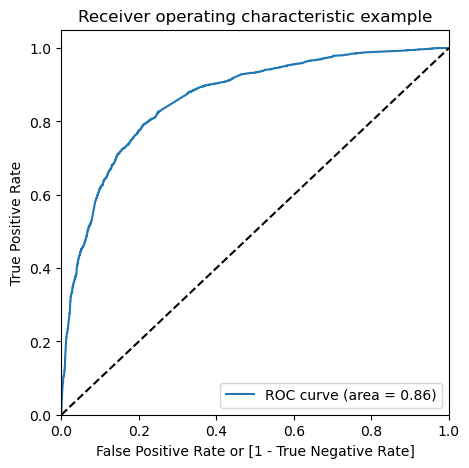

In [138]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The curve is closer to the left border than to the right border hence our model is having great accuracy.</br>
The curve area is 86% of the total area.

In [139]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.028976,2201,0,1,0,0,0,0,0,0,0,0,0
1,1,0.287919,4037,0,1,1,1,0,0,0,0,0,0,0
2,1,0.906877,1612,1,1,1,1,1,1,1,1,1,1,1
3,0,0.363668,9106,0,1,1,1,1,0,0,0,0,0,0
4,0,0.068499,1236,0,1,0,0,0,0,0,0,0,0,0


In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.570234  0.972451  0.319672
0.2   0.2  0.717487  0.902961  0.601947
0.3   0.3  0.779356  0.825658  0.750512
0.4   0.4  0.792456  0.750822  0.818391
0.5   0.5  0.795139  0.661184  0.878586
0.6   0.6  0.785827  0.584293  0.911373
0.7   0.7  0.757260  0.447780  0.950051
0.8   0.8  0.733270  0.353207  0.970031
0.9   0.9  0.692551  0.221628  0.985912


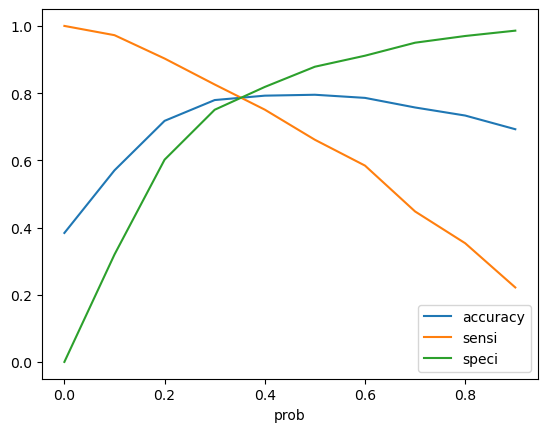

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

We can say from the above curve that the optimum point can be near to 0.36

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.028976,2201,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.287919,4037,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.906877,1612,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.363668,9106,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.068499,1236,0,1,0,0,0,0,0,0,0,0,0,0


### Assigning Lead Score to the Training data

In [143]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.028976,2201,0,1,0,0,0,0,0,0,0,0,0,0,3
1,1,0.287919,4037,0,1,1,1,0,0,0,0,0,0,0,0,29
2,1,0.906877,1612,1,1,1,1,1,1,1,1,1,1,1,1,91
3,0,0.363668,9106,0,1,1,1,1,0,0,0,0,0,0,1,36
4,0,0.068499,1236,0,1,0,0,0,0,0,0,0,0,0,0,7


## Model Evaluation

In [144]:
# Overall Accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7891414141414141


In [145]:
 # Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3077,  827],
       [ 509, 1923]], dtype=int64)

In [146]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [147]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7907072368421053


In [148]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7881659836065574


In [149]:
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.21183401639344263


In [150]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.6992727272727273


In [151]:
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8580591187953152


## Precision and Recall

In [152]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3430,  474],
       [ 824, 1608]], dtype=int64)

In [153]:
# Precision
TP / TP + FP
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7723342939481268


In [154]:
TP / TP + FN
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6611842105263158


## Making predictions on the test set

#### Scaling the test data

In [155]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset
X_test[['Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website', 'Page Views Per Visit']])

In [156]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
5455,-0.887616,0,0,1,0,0,0,0,0,0,0
1526,-0.611478,0,0,0,0,0,0,0,1,0,0
1034,-0.862182,0,0,0,0,0,0,0,0,0,0
7062,-0.364407,0,0,0,0,0,0,0,0,1,0
7716,1.437755,0,0,0,0,0,0,0,0,1,0


In [157]:
# Adding a const in statsmodel
X_test_sm = sm.add_constant(X_test)
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

5455    0.844975
1526    0.472518
1034    0.062630
7062    0.462580
7716    0.870484
2313    0.814023
6297    0.801152
5828    0.068728
737     0.975668
8128    0.604085
dtype: float64

In [158]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5455,0.844975
1526,0.472518
1034,0.062630
7062,0.462580
7716,0.870484


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [160]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [161]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,5455,0.844975
1,0,1526,0.472518
2,0,1034,0.062630
3,0,7062,0.462580
4,1,7716,0.870484


In [163]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,5455,0.844975
1,0,1526,0.472518
2,0,1034,0.062630
3,0,7062,0.462580
4,1,7716,0.870484


In [164]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [165]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,5455,1,0.844975,84
1,1526,0,0.472518,47
2,1034,0,0.062630,6
3,7062,0,0.462580,46
4,7716,1,0.870484,87


In [166]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,5455,1,0.844975,84,1
1,1526,0,0.472518,47,1
2,1034,0,0.062630,6,0
3,7062,0,0.462580,46,1
4,7716,1,0.870484,87,1


In [167]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [168]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,5455,1,0.844975,84,1
1,1526,0,0.472518,47,1
2,1034,0,0.062630,6,0
3,7062,0,0.462580,46,1
4,7716,1,0.870484,87,1


In [169]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7842415316642121

In [170]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1311,  408],
       [ 178,  819]], dtype=int64)

In [171]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [177]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

print("Sensitivity : ",TP / float(TP+FN))

print("Specificity :",TN / float(TN+FP))

print("False Positive rate : ",FP/ float(TN+FP))

print("Positive Predictive Value :",TP / float(TP+FP))

print("Negative Predictive Value : ",TN / float(TN+ FN))

Accuracy : 0.7891414141414141
Sensitivity :  0.8214643931795386
Specificity : 0.7626527050610821
False Positive rate :  0.23734729493891799
Positive Predictive Value : 0.6674816625916871
Negative Predictive Value :  0.880456682337139


In [173]:
from sklearn.metrics import precision_score
import pandas as pd

In [174]:
precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.6674816625916871

In [175]:
from sklearn.metrics import recall_score
import pandas as pd

In [1]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

NameError: name 'recall_score' is not defined

## Summary

The organization should prioritize calling leads originating from "Welingak Websites" and "Reference," as these sources are more likely to convert.</br>
Leads identified as "working professionals" should be contacted, as they have a higher probability of conversion.</br>
Leads who have spent significant time browsing the website should be targeted, as they demonstrate greater interest and conversion potential.</br>
It is advisable to reach out to leads generated through "Olark Chat," as these leads are more likely to convert.</br>
Leads whose last recorded activity was receiving an SMS should also be contacted, as they are more likely to convert.</br>
Leads whose last activity involved an "Olark Chat Conversation" should not be contacted, as they are less likely to convert.</br>
Leads originating from "Landing Page Submission" are unlikely to convert and should not be prioritized for calls.</br>
Leads with a specialization listed as "Others" should not be contacted, as they have a low likelihood of conversion.</br>
Leads who selected "Do not Email" as "Yes" should not be called, as they are less likely to convert.</br>